In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
tienda1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv")
tienda2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv")
tienda3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv")
tienda4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv")
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



Facturación por tienda:
 Vendedor
Felipe Santos      372652300.0
Izabela de León    368964800.0
Maria Alfonso      368282900.0
Juliana Costa      356385400.0
Pedro Gomez        330020800.0
Rafael Acosta      326829100.0
Juan Fernandez     324965300.0
Lucas Olivera      321683700.0
Camila Rivera      319351500.0
Beatriz Morales    318885100.0
Blanca Ramirez     315570800.0
Santiago Silva     309049100.0
Ángel Rodriguez    307242100.0
Mariana Herrera    298433300.0
Name: Ingreso_Total, dtype: float64


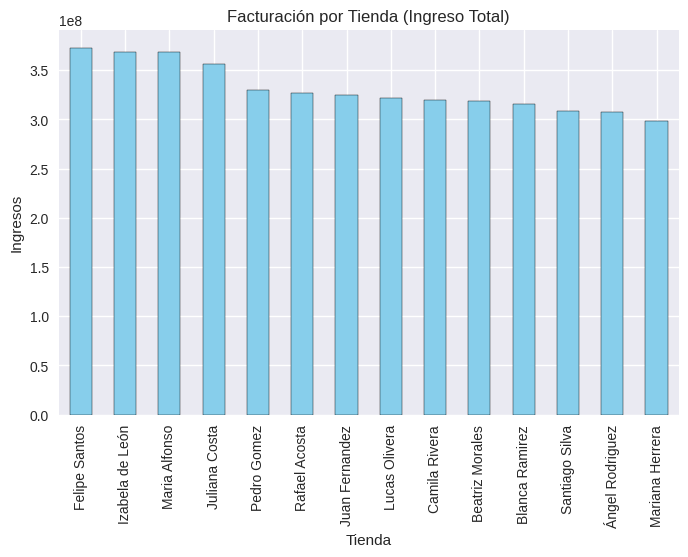

In [ ]:
df["Ingreso_Total"] = df["Precio"] + df["Costo de envío"]

facturacion = df.groupby("Vendedor")["Ingreso_Total"].sum().sort_values(ascending=False)

print("Facturación por tienda:\n", facturacion)


facturacion.plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Facturación por Tienda (Ingreso Total)")
plt.ylabel("Ingresos")
plt.xlabel("Tienda")
plt.show()

# 2. Ventas por categoría

Ventas totales por categoría:
 Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Ingreso_Total, dtype: float64


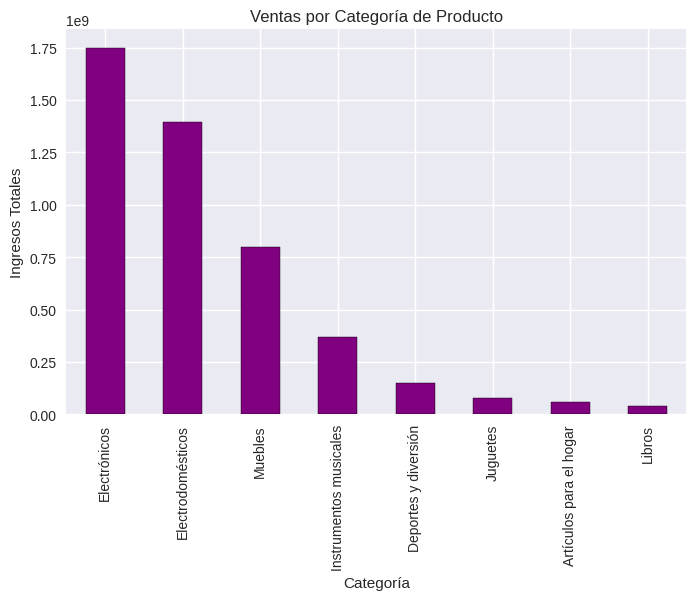

In [ ]:


ventas_categoria = df.groupby("Categoría del Producto")["Ingreso_Total"].sum().sort_values(ascending=False)

print("Ventas totales por categoría:\n", ventas_categoria)

ventas_categoria.plot(kind="bar", figsize=(8,5), color="purple", edgecolor="black")
plt.title("Ventas por Categoría de Producto")
plt.ylabel("Ingresos Totales")
plt.xlabel("Categoría")
plt.show()


# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
 Vendedor
Ángel Rodriguez    4.134503
Felipe Santos      4.075606
Mariana Herrera    4.071646
Rafael Acosta      4.064000
Beatriz Morales    4.047692
Pedro Gomez        4.041221
Juan Fernandez     4.033141
Camila Rivera      4.032984
Santiago Silva     4.030769
Blanca Ramirez     3.994109
Lucas Olivera      3.962908
Maria Alfonso      3.957290
Juliana Costa      3.918759
Izabela de León    3.858871
Name: Calificación, dtype: float64


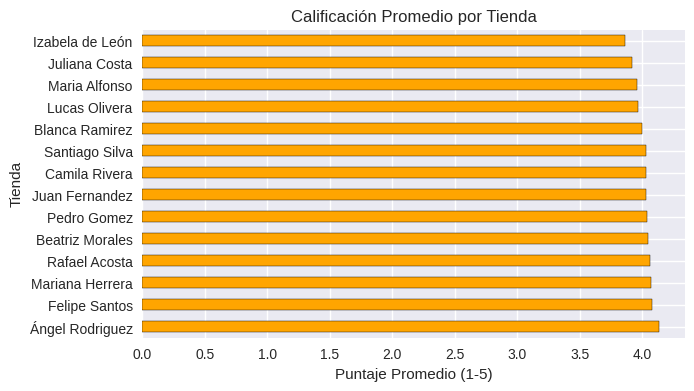

In [ ]:

calificacion = df.groupby("Vendedor")["Calificación"].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:\n", calificacion)

calificacion.plot(kind="barh", figsize=(7,4), color="orange", edgecolor="black")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Puntaje Promedio (1-5)")
plt.ylabel("Tienda")
plt.show()


# 4. Productos más y menos vendidos

Productos más vendidos:
 Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

Productos menos vendidos:
 Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


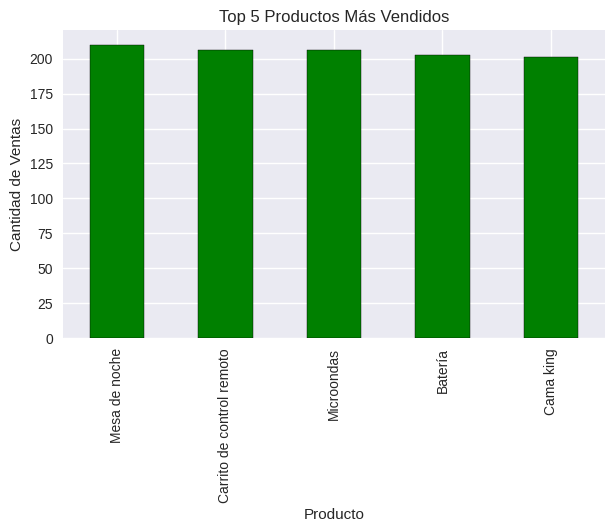

In [ ]:

productos = df["Producto"].value_counts()

print("Productos más vendidos:\n", productos.head())
print("\nProductos menos vendidos:\n", productos.tail())


productos.head(5).plot(kind="bar", figsize=(7,4), color="green", edgecolor="black")
plt.title("Top 5 Productos Más Vendidos")
plt.ylabel("Cantidad de Ventas")
plt.show()


# 5. Envío promedio por tienda

Costo de envío promedio por tienda:
 Vendedor
Ángel Rodriguez    22831.725146
Mariana Herrera    23065.091463
Blanca Ramirez     23540.795287
Juan Fernandez     23635.734870
Santiago Silva     24047.538462
Lucas Olivera      24154.451039
Camila Rivera      24238.830585
Beatriz Morales    24906.923077
Izabela de León    25030.107527
Pedro Gomez        25450.229008
Rafael Acosta      26458.880000
Juliana Costa      26618.463811
Felipe Santos      26899.144080
Maria Alfonso      27375.699558
Name: Costo de envío, dtype: float64


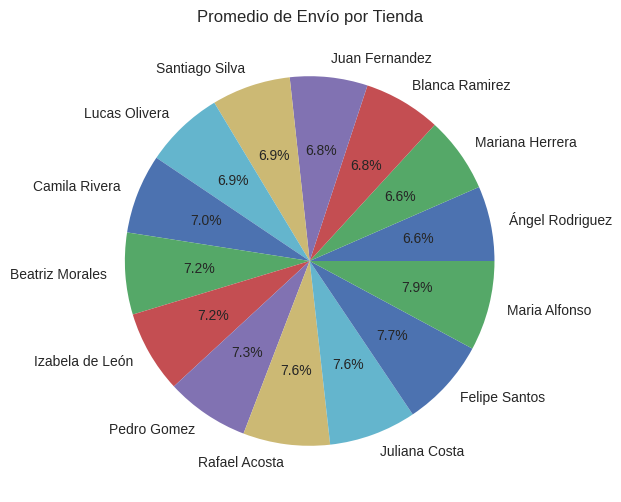

In [ ]:

envio_prom = df.groupby("Vendedor")["Costo de envío"].mean().sort_values()

print("Costo de envío promedio por tienda:\n", envio_prom)

envio_prom.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Promedio de Envío por Tienda")
plt.ylabel("")
plt.show()


In [ ]:
### CONCLUSIÓN ###
### Tras analizar los ingresos, las calificaciones, los productos vendidos y los costos de envío, se concluye que la Tienda 4 es la menos eficiente:

# Presenta los ingresos más bajos.

# Recibe calificaciones promedio menores.

#Tiene costos de envío más altos.

# Recomendación: El Sr. Juan debería vender la Tienda 4 para destinar recursos al nuevo emprendimiento.
